# AdaBoost

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


Loading the dataset of the users, with all the indicators created in the 1.2 notebook

In [2]:
df = pd.read_csv('./dataset/users_df_dataset_cleaned_with_indicators.csv')

Find the unique languages and mapping each of them to a number to be able to classify with lang too

In [3]:
var = sorted(df['lang'].unique())
mapping = dict(zip(var, range(0, len(var) + 1)))
df['lang_num'] = df['lang'].map(mapping).astype(int)
df.drop(columns='lang', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   user_id                                   11109 non-null  int64  
 1   name                                      11108 non-null  object 
 2   bot                                       11109 non-null  int64  
 3   created_at                                11109 non-null  object 
 4   statuses_count                            11109 non-null  int64  
 5   account_age_in_days                       11109 non-null  int64  
 6   number_of_tweets                          11109 non-null  int64  
 7   account_average_tweets_per_day            11109 non-null  float64
 8   avg_tweets_per_actual_day                 11109 non-null  float64
 9   day_with_most_tweets                      11109 non-null  object 
 10  max_number_of_tweets_in_a_day     

Removing the unnecessary attributes and splitting the dataframe for the classification

In [4]:
df = df[df.columns.difference(['user_id', 'name', 'created_at', 'day_with_most_tweets', 'account_age_in_days'])]
label = df.pop('bot')

# Splitting the dataframe in two sets, a training set (70%) and a test set (30%)
train_set, test_set, train_label, test_label = train_test_split(df, label, stratify=label, shuffle=True, test_size=0.30)

Adaboost classifier creation and fitting with the train set (by default the adaboost classifier uses a DecisionTreeClassifier as base_estimator, with max_depth=1)

In [5]:
clf = AdaBoostClassifier()
clf.fit(train_set, train_label)

AdaBoostClassifier()

Test the results predicted by the classifier on the test set.

In [6]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['Not Bot', 'Bot']))

              precision    recall  f1-score   support

     Not Bot       0.93      0.66      0.77      1498
         Bot       0.78      0.96      0.86      1835

    accuracy                           0.83      3333
   macro avg       0.85      0.81      0.82      3333
weighted avg       0.84      0.83      0.82      3333



For better interpretation we want to see the accuracy avg between the false positives and the true positives

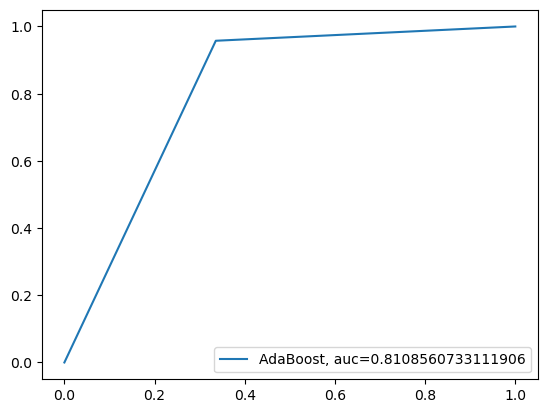

In [7]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

By plotting a matrix showing the number of the actual label and the predicted label on the test set we can see that we have a lot of false positive.

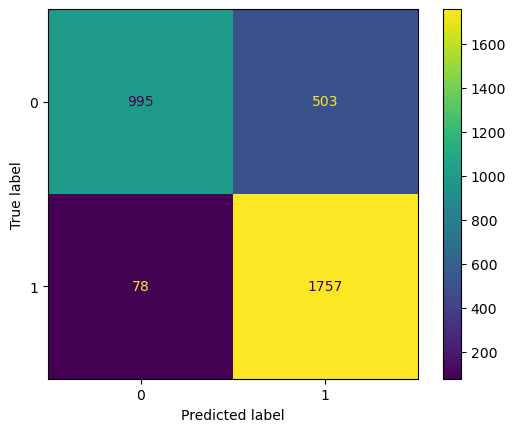

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, test_set, test_label)
plt.show() 

## Let's compute the classifier fitting, setting the estimator and the parameters manually

In [9]:
base = tree.DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.1)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=200)

Let's see the results of the prediction with the new classifier

In [10]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.84      0.70      0.76      1498
           1       0.78      0.89      0.83      1835

    accuracy                           0.80      3333
   macro avg       0.81      0.79      0.80      3333
weighted avg       0.81      0.80      0.80      3333



Plot the accuracy avg between false positives and true positives.


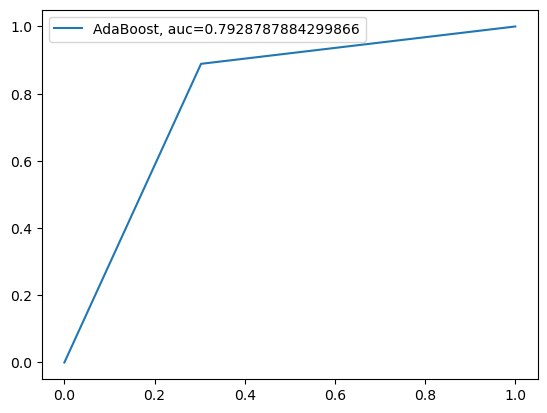

In [11]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

As we can see no improvement by just usign a DecisionTree with max_depth=5

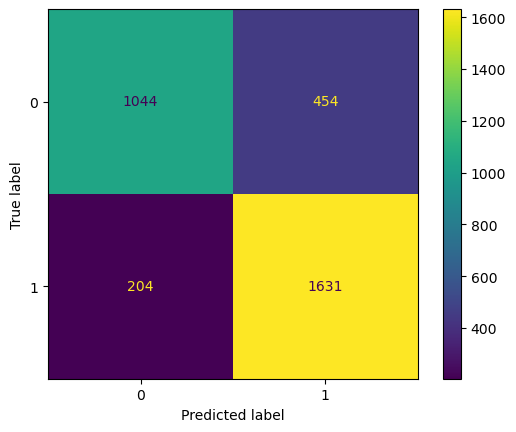

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, test_set, test_label)
plt.show() 

### Let's try normalizing the dataset with minmax

In [13]:
# Normalization
minmax_normalized_df = (df-df.min()) / (df.max()-df.min()) 
train_set, test_set, train_label, test_label = train_test_split(minmax_normalized_df, label, stratify=label, shuffle=True, test_size=0.30)

Execute the classiefier fitting

In [14]:
base = tree.DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.1)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=200)

Let's see the results

In [15]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1498
           1       0.80      0.90      0.84      1835

    accuracy                           0.82      3333
   macro avg       0.82      0.81      0.81      3333
weighted avg       0.82      0.82      0.81      3333



Plot the accuracy

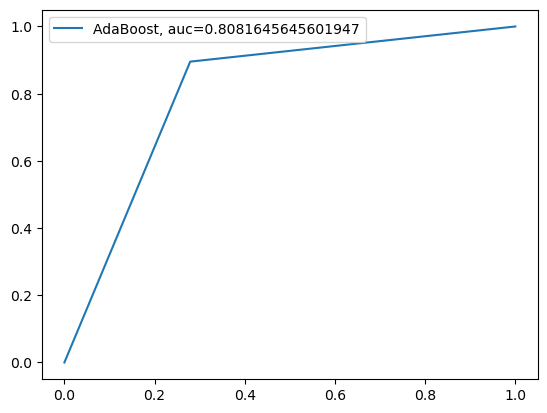

In [16]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

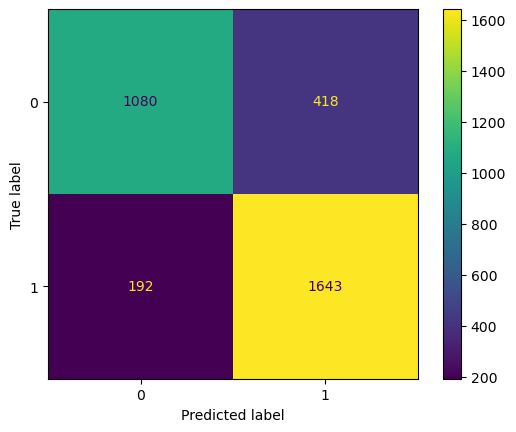

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, test_set, test_label)
plt.show() 

No Improvement with the min max and the decision tree with max_depth=5

### Let's try normalization with the mean

In [18]:
# Normalization with mean
mean_normalized_df = df / df.mean()
train_set, test_set, train_label, test_label = train_test_split(mean_normalized_df, label, stratify=label, shuffle=True, test_size=0.30)

Create the classifier and fit it

In [19]:
base = tree.DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.1)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=200)

See the results

In [20]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.86      0.69      0.77      1498
           1       0.78      0.91      0.84      1835

    accuracy                           0.81      3333
   macro avg       0.82      0.80      0.81      3333
weighted avg       0.82      0.81      0.81      3333



Plot the accuracy

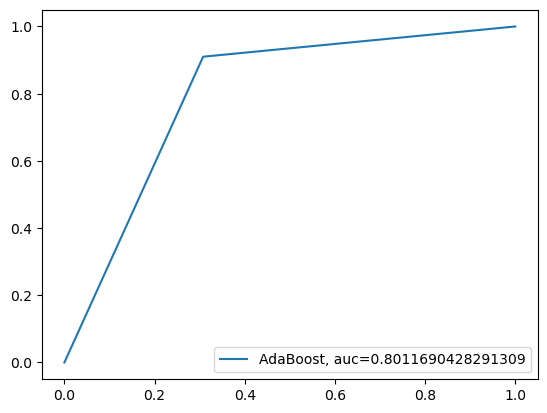

In [21]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

And see the difference between the real label and the predicted one

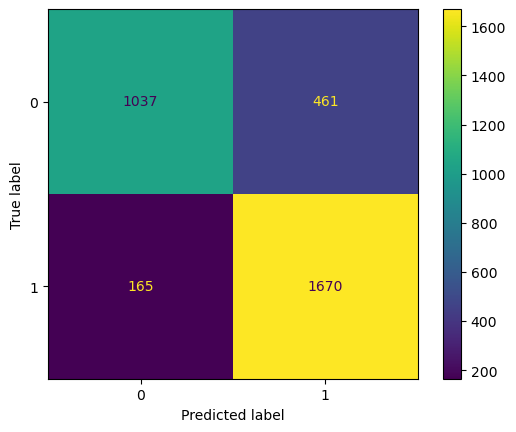

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, test_set, test_label)
plt.show() 

No improvement with the mean normalization too.

### Let's try normalization with the std deviation too

In [23]:
# Normalization with std dev
std_normalized_df = (df - df.mean()) / df.std()
train_set, test_set, train_label, test_label = train_test_split(std_normalized_df, label, stratify=label, shuffle=True, test_size=0.30)

Create the classifier and fit it

In [24]:
base = tree.DecisionTreeClassifier(max_depth=5)
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.1)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=200)

See the results

In [25]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      1498
           1       0.79      0.90      0.84      1835

    accuracy                           0.81      3333
   macro avg       0.82      0.80      0.81      3333
weighted avg       0.82      0.81      0.81      3333



Plot the accuracy

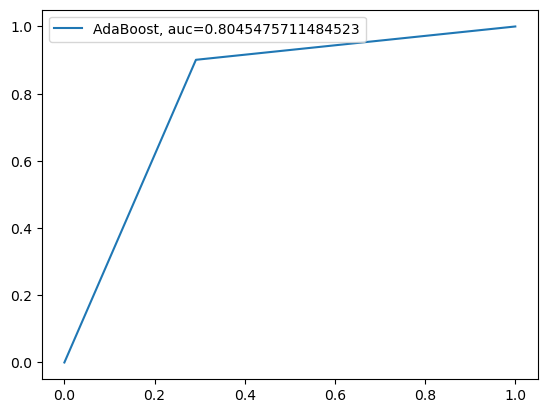

In [26]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

Plot the matrix to compare real label with predicted one

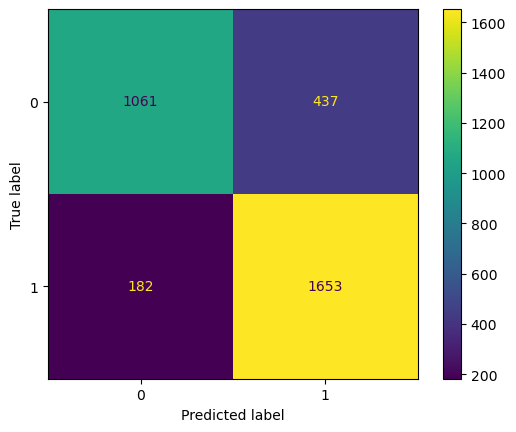

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, test_set, test_label)
plt.show() 

Nothing, no iprovement by normalization with decision tree max_depth at 5

### Let's try standard AdaBoost with normalization

In [28]:
# Normalization with min max
std_normalized_df = (df-df.min()) / (df.max()-df.min()) 
train_set, test_set, train_label, test_label = train_test_split(std_normalized_df, label, stratify=label, shuffle=True, test_size=0.30)

In [29]:
clf = AdaBoostClassifier(n_estimators=250)
clf.fit(train_set, train_label)

AdaBoostClassifier(n_estimators=250)

In [30]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1498
           1       0.79      0.96      0.87      1835

    accuracy                           0.84      3333
   macro avg       0.86      0.82      0.83      3333
weighted avg       0.85      0.84      0.83      3333



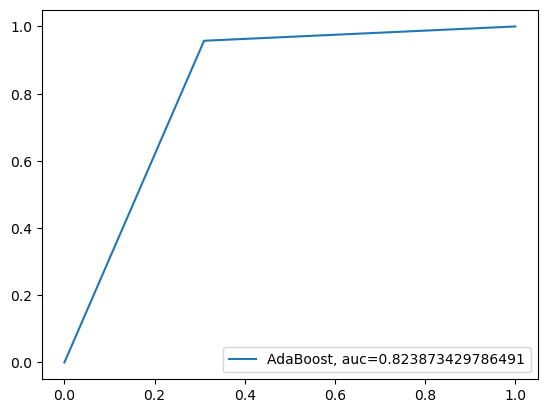

In [31]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

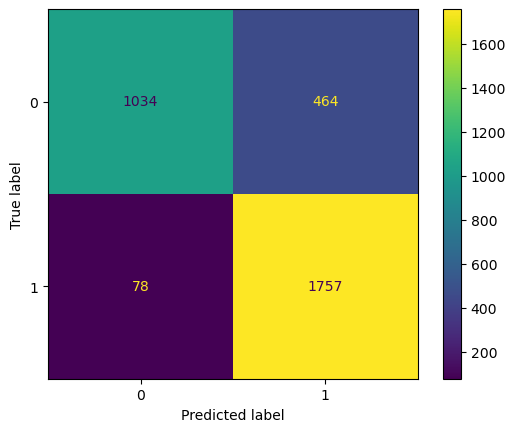

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, test_set, test_label)
plt.show() 

### Let's try standard AdaBoost with normalization and different estimator

In [33]:
# Normalization with min max
std_normalized_df = (df-df.min()) / (df.max()-df.min()) 
train_set, test_set, train_label, test_label = train_test_split(std_normalized_df, label, stratify=label, shuffle=True, test_size=0.30)

In [34]:
from sklearn import naive_bayes
base = naive_bayes.GaussianNB()
clf = AdaBoostClassifier(base_estimator=base, n_estimators=200, learning_rate=0.05)
clf.fit(train_set, train_label)

AdaBoostClassifier(base_estimator=GaussianNB(), learning_rate=0.05,
                   n_estimators=200)

In [35]:
test_pred_clf = clf.predict(test_set)
print(classification_report(test_label, 
                            test_pred_clf, 
                            target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1498
           1       0.79      0.94      0.86      1835

    accuracy                           0.83      3333
   macro avg       0.85      0.81      0.82      3333
weighted avg       0.84      0.83      0.82      3333



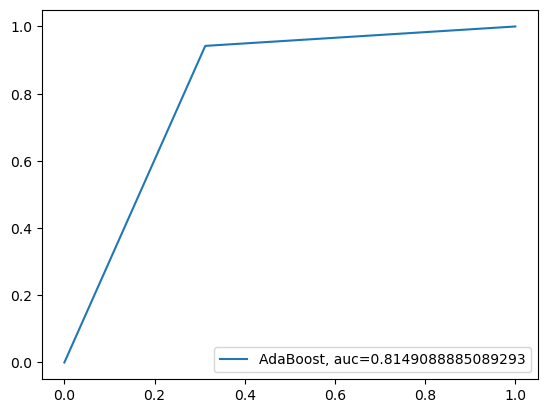

In [36]:
plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(test_label, test_pred_clf)
auc = metrics.roc_auc_score(test_label, test_pred_clf)
plt.plot(fpr,tpr,label="AdaBoost, auc="+str(auc))

plt.legend(loc=0)

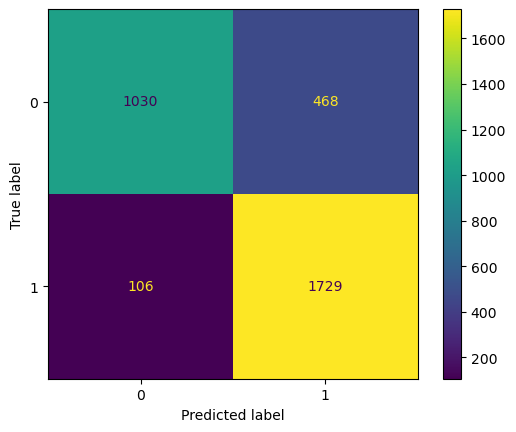

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, test_set, test_label)
plt.show() 

As we can see there's no improvement by using a different base_estimator, with the normalization
(Tested without the normalization too, seeing a big loss of accuracy)